<a href="https://colab.research.google.com/github/sajnanoushad/kmean_hierarchial-clustering/blob/main/kmean_hierarchial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets,metrics,cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


Load iris dataset

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)


display first few rows of dataset

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Get dataset information

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Get descriptive statistics of the dataset

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


visualization of columns

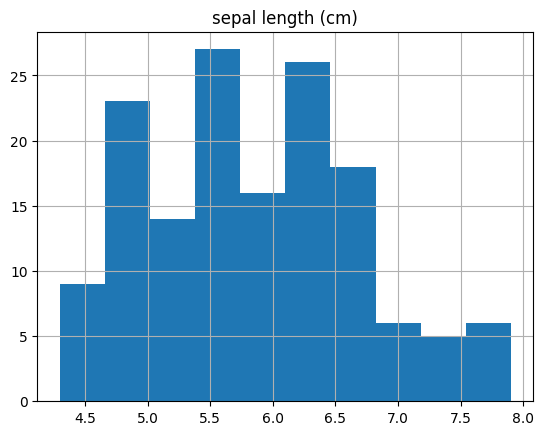

In [ ]:
data.hist(column ='sepal length (cm)')
plt.show()

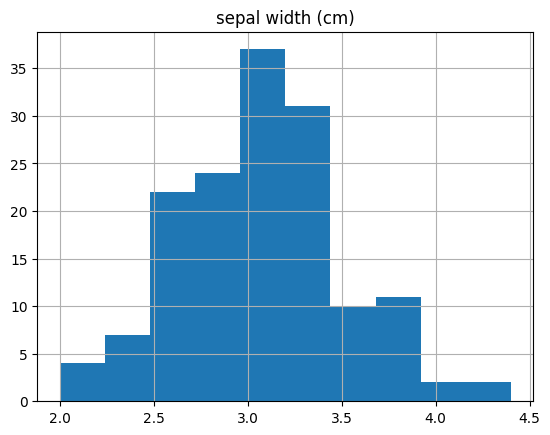

In [ ]:
data.hist(column ='sepal width (cm)')
plt.show()

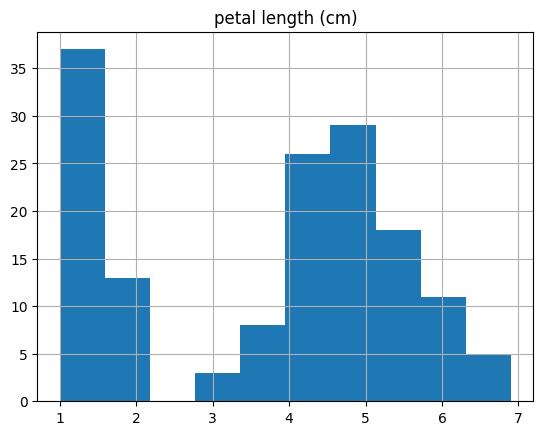

In [ ]:
data.hist(column ='petal length (cm)')
plt.show()

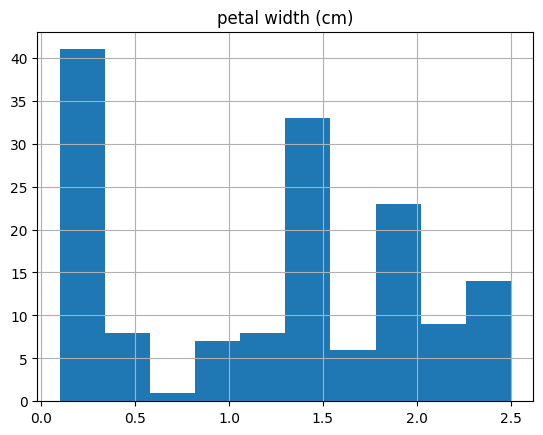

In [ ]:
data.hist(column ='petal width (cm)')
plt.show()

Applying KMeans clustering

 KMeans clustering is an iterative algorithm that partitions a dataset into K distinct non-overlapping subgroups (clusters). For each cluster, it calculates the centroid (the average of all points in the cluster) and assigns each data point to the cluster whose centroid is nearest. The algorithm iterates until the assignments no longer change or a maximum number of iterations is reached

Suitability: KMeans is particularly suitable for the Iris dataset as it is small, well-structured, and the features (sepal and petal dimensions) exhibit distinct groups that KMeans can effectively cluster. Additionally, the Iris dataset has a spherical cluster structure, which KMeans is designed to optimize.

Elbow method to find the number of cluster

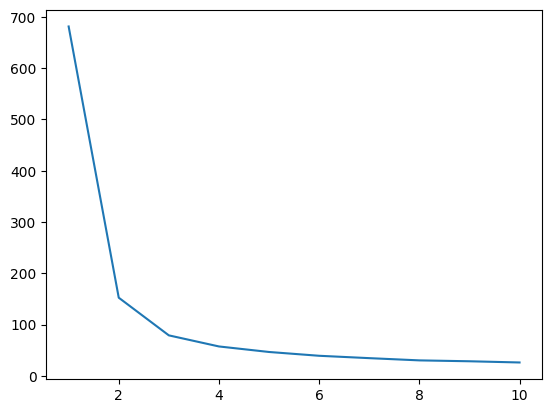

In [ ]:
Centroid_list = []
No_of_clusters = range(1,11)

for i in No_of_clusters :
  kmeans = cluster.KMeans(n_clusters= i ,init = 'k-means++' ,max_iter= 300,n_init= 10 , random_state=0)
  kmeans.fit(data.values)
  Centroid_list.append(kmeans.inertia_)

plt.plot(No_of_clusters,Centroid_list)
plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters= 3 ,init = 'k-means++' ,max_iter= 300,n_init= 10 , random_state=0 )
centroid = kmeans.fit_predict(data.values)


In [39]:
clusters_kmeans = kmeans.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [40]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.values)

In [ ]:
print(centroid)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


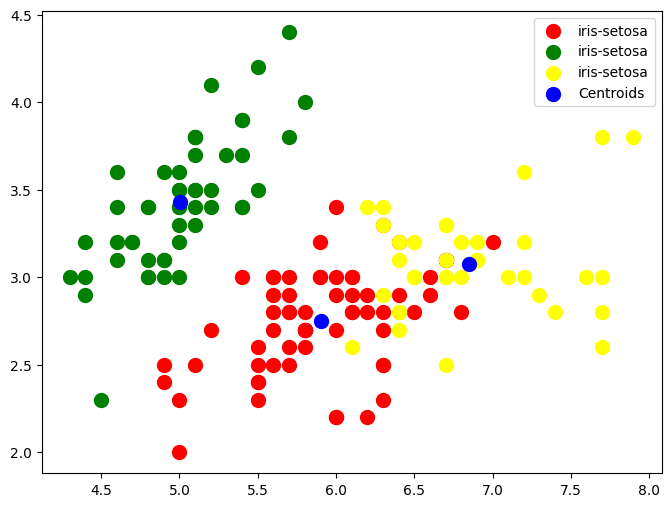

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data.values[centroid == 0 , 0],data.values[centroid == 0,1],s = 100,c='red', label = 'iris-setosa')
plt.scatter(data.values[centroid == 1 , 0],data.values[centroid == 1,1],s = 100,c='green', label = 'iris-setosa')
plt.scatter(data.values[centroid == 2 , 0],data.values[centroid == 2,1],s = 100,c='yellow', label = 'iris-setosa')
plt.scatter(kmeans.cluster_centers_[: , 0],kmeans.cluster_centers_[: , 1],s = 100,c='blue', label = 'Centroids')
plt.legend()

Applying agglomerative clustering

Hierarchical Clustering Description: Hierarchical clustering builds a hierarchy of clusters either through a bottom-up approach (agglomerative) or a top-down approach (divisive). Agglomerative clustering, the most commonly used method, starts by treating each data point as a singleton cluster and progressively merges the closest pairs of clusters until a single cluster encompasses all the points, or a specified number of clusters is maintained.

Suitability: Hierarchical clustering is advantageous for the Iris dataset as it does not require pre-specifying the number of clusters and can provide a dendrogram for visualizing the clusters and their interrelations. This method is effective due to the moderate size of the dataset and the potential for nuanced relationships among the flower species.

In [31]:
n_clusters = 3 # Set the number of clusters
agglo = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglo.fit_predict(data.values)

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.values)

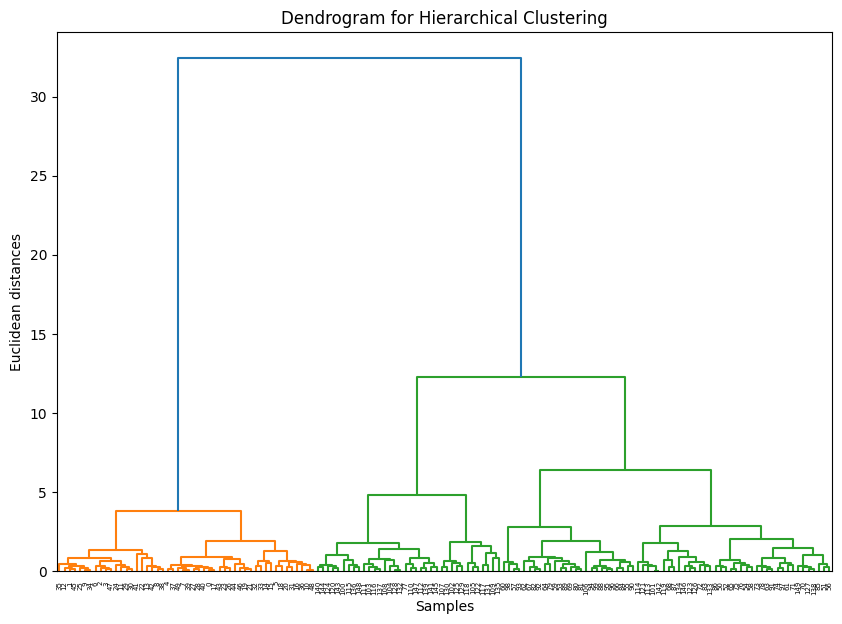

In [37]:

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

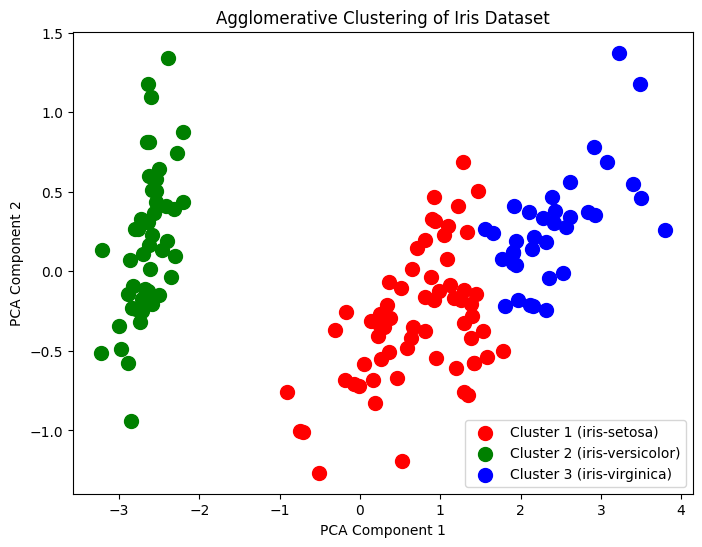

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[clusters == 0, 0], reduced_data[clusters == 0, 1], s=100, c='red', label='Cluster 1 (iris-setosa)')
plt.scatter(reduced_data[clusters == 1, 0], reduced_data[clusters == 1, 1], s=100, c='green', label='Cluster 2 (iris-versicolor)')
plt.scatter(reduced_data[clusters == 2, 0], reduced_data[clusters == 2, 1], s=100, c='blue', label='Cluster 3 (iris-virginica)')
plt.title('Agglomerative Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()